<a href="https://colab.research.google.com/github/a22000025/UAS_Visualisasi/blob/main/Transaksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('/content/transaksi2.csv')
data_kode = data[' Kode']
data_no = data[' no']
data_tran = data['tran']
data

,Date,Kode,no,tran
0,2017-09-04 07:16:20,22081,10,12461
1,2017-07-09 11:39:20,22989,100,12590
2,2017-03-20 12:18:20,22629,64,16839
3,2018-01-24 08:50:20,21615,1,13596
4,2018-01-17 12:14:20,84375,12,12395
...,...,...,...,...
7464,2018-02-02 09:49:20,20771,2,14606
7465,2017-03-23 12:52:20,22493,12,17001
7466,2017-10-25 10:28:20,23118,2,15856
7467,2017-07-19 09:54:20,23184,2,14769


<ipython-input-6-5f3cc62720d5>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Set3', len(kode_unik))


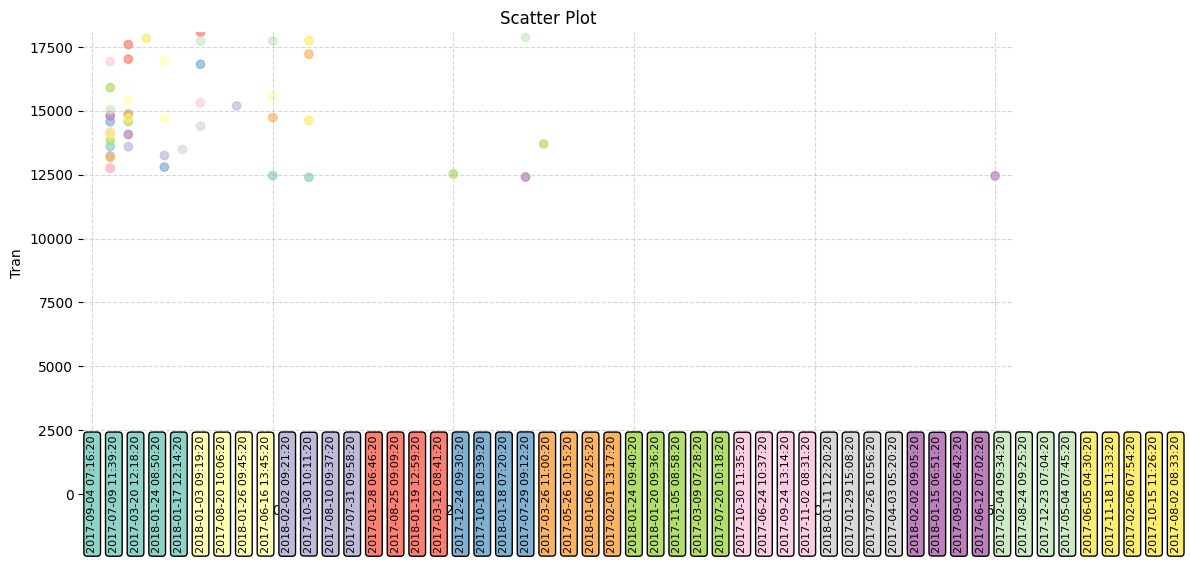

In [6]:
data = data.drop_duplicates(subset=[' Kode', ' no', 'tran'])

data_kode = data[' Kode']
data_no = data[' no']
data_tran = data['tran']
data_date = data['Date']

data_kode = data_kode[:51]
data_no = data_no[:51]
data_tran = data_tran[:51]
data_date = data_date[:51]

kode_unik = data_date.unique()
colors = cm.get_cmap('Set3', len(kode_unik))
color_mapping = {kode: colors(i) for i, kode in enumerate(kode_unik)}

box_width = 0.4
column_width = 0.5
num_columns = len(kode_unik) // column_width + (1 if len(kode_unik) % column_width > 0 else 0)

plt.figure(figsize=(12, 6))

for i, kode in enumerate(kode_unik):
    column_idx = i // column_width
    x_box = i % column_width + column_idx * (box_width + 0.2)
    y_box = -(i % column_width) * box_width
    plt.text(x_box, y_box, kode, ha='center', va='center', rotation=90, fontsize=8, bbox=dict(facecolor=color_mapping[kode], edgecolor='black', boxstyle='round'))

plt.scatter(data_no, data_tran, c=[color_mapping[kode] for kode in data_date], alpha=0.7)

plt.title('Scatter Plot')
plt.xlabel('No')
plt.ylabel('Tran')

plt.xlim(-0.5, column_width * num_columns)
plt.ylim(-box_width * column_width, max(data_tran) + 1)

plt.box(False)

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()